# Relationship Between Sprint Race Results and Overall Driver Race Success:

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

sprint = pd.read_csv('cleaned_sprint_results.csv')
results = pd.read_csv('cleaned_results.csv')
drivers = pd.read_csv('cleaned_drivers.csv')
races = pd.read_csv('cleaned_races.csv')

races_columns = races[['raceId', 'year']]
results_with_year = results.merge(races_columns, on='raceId', how='inner')

filtered_results = results_with_year[results_with_year['year'] >= 2021]
filtered_results = filtered_results[~filtered_results['raceId'].isin(sprint['raceId'])]

sprint_columns = sprint[['driverId', 'position', 'points']].copy()
results_columns = filtered_results[['driverId', 'points']]
drivers['driver_name'] = drivers['driver_forename'] + ' ' + drivers['driver_surname']
driver_columns = drivers[['driverId', 'driver_name']]

sprint_columns.loc[:, 'finished_first'] = (sprint_columns['position'] == 1).astype(int)

sprint_first = sprint_columns.groupby('driverId', as_index=False)['finished_first'].max() 

grouped_results = results_columns.groupby('driverId', as_index=False)['points'].sum()

merged_df = grouped_results.merge(driver_columns, on='driverId', how='inner')
merged_df = merged_df.merge(sprint_top3, on='driverId', how='inner')

merged_df.head(10)

,driverId,points,driver_name,finished_first
0,1,654.5,Lewis Hamilton,0
1,4,249.0,Fernando Alonso,0
2,8,10.0,Kimi Räikkönen,0
3,9,0.0,Robert Kubica,0
4,20,76.0,Sebastian Vettel,0
5,807,6.0,Nico Hülkenberg,0
6,815,550.0,Sergio Pérez,1
7,817,110.0,Daniel Ricciardo,0
8,822,214.0,Valtteri Bottas,1
9,825,17.0,Kevin Magnussen,0


Text(0, 0.5, 'Total Season Race Points')

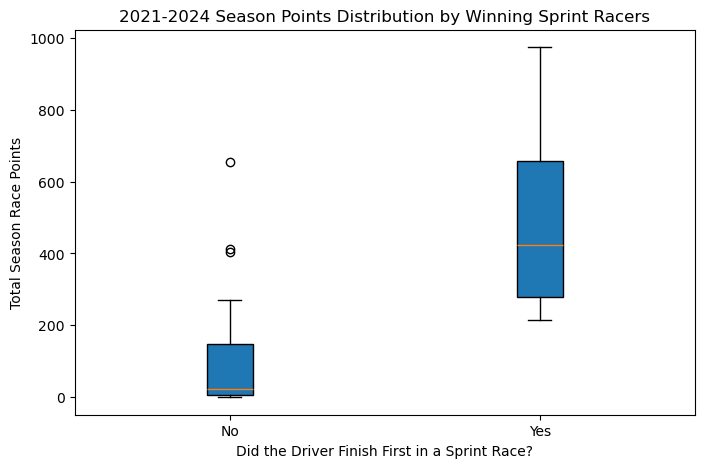

In [70]:
yes_first = merged_df[merged_df['finished_first'] == 1]['points']
no_first = merged_df[merged_df['finished_first'] == 0]['points']

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot([no_first, yes_first], tick_labels=['No', 'Yes'], patch_artist=True)

ax.set_title('2021-2024 Season Points Distribution by Winning Sprint Racers')
ax.set_xlabel('Did the Driver Finish First in a Sprint Race?')
ax.set_ylabel('Total Season Race Points')